<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=43.95926194764529, pvalue=2.8468694618417374e-10)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [0]:
# TODO - your code!

# Getting started with drug data
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2018-12-05 22:59:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip.2’

drugsCom_raw.zip.2  100%[===================>]  41.00M  17.0MB/s    in 2.4s    

2018-12-05 22:59:43 (17.0 MB/s) - ‘drugsCom_raw.zip.2’ saved [42989872/42989872]



In [0]:
!ls
!unzip "drugsCom_raw.zip"

drugsCom_raw.zip    drugsCom_raw.zip.2	  drugsComTrain_raw.tsv
drugsCom_raw.zip.1  drugsComTest_raw.tsv  sample_data
Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls
!head drugsComTrain_raw.tsv

drugsCom_raw.zip    drugsCom_raw.zip.2	  drugsComTrain_raw.tsv
drugsCom_raw.zip.1  drugsComTest_raw.tsv  sample_data
	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better.

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

!pip install --upgrade seaborn
import seaborn as sns

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
df = pd.read_table("drugsComTrain_raw.tsv")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [0]:
df.condition.fillna(method="ffill", inplace=True)
df.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [0]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    interval
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return interval

In [0]:
pivotdf = pd.pivot_table(df,index=["drugName"],
               values=["rating"],
               aggfunc=[np.mean, confidence_interval])

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
pivotdf.head(100)

,mean,confidence_interval
,rating,rating
drugName,,
A + D Cracked Skin Relief,10.000000,NaN
A / B Otic,10.000000,NaN
Abacavir / dolutegravir / lamivudine,8.211538,0.693733
Abacavir / lamivudine / zidovudine,9.000000,NaN
Abatacept,7.157895,1.648352
Abilify,6.540359,0.316237
Abilify Discmelt,8.000000,0.000000
Abilify Maintena,7.750000,7.160504


In [0]:
pivotdf.dropna(inplace=True)
pivotdf

,mean,confidence_interval
,rating,rating
drugName,,
Abacavir / dolutegravir / lamivudine,8.211538,0.693733
Abatacept,7.157895,1.648352
Abilify,6.540359,0.316237
Abilify Discmelt,8.000000,0.000000
Abilify Maintena,7.750000,7.160504
Abiraterone,9.111111,1.510410
AbobotulinumtoxinA,7.000000,4.302653
Abraxane,7.500000,6.935981


In [0]:
print(pivotdf.columns)

MultiIndex(levels=[['mean', 'confidence_interval'], ['rating']],
           labels=[[0, 1], [0, 0]])


In [0]:
pivotdf_indices = pivotdf.index.values
pivotdf_means = [pivotdf.xs(index)[0] for index in pivotdf_indices]
pivotdf_ci = [pivotdf.xs(index)[1] for index in pivotdf_indices]

restructred_dict = {"drugnames": pivotdf_indices,
                   "means": pivotdf_means,
                   "ci": pivotdf_ci}

restructred_df = pd.DataFrame(restructred_dict)


Text(0,0.5,'Mean')

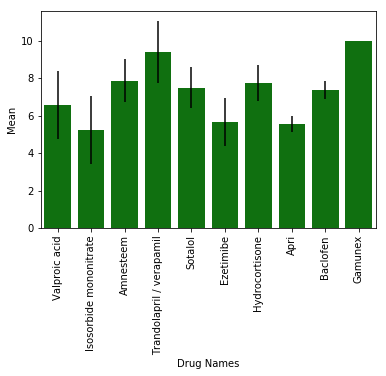

In [0]:
# For plotting
reduceddf = restructred_df.sample(10)

sns.barplot(x='drugnames', y='means', 
            data=reduceddf, 
            color="green", 
            yerr=reduceddf['ci'])
plt.xticks(rotation='vertical');
plt.xlabel("Drug Names")
plt.ylabel("Mean")

In [0]:
testdf = df[df.drugName == "Absorica"]
testdf

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
100228,179068,Absorica,Acne,"""I&rsquo;m a 23 year old female who has had ac...",10.0,"June 24, 2014",9
144369,179066,Absorica,Acne,"""My son was on this drug for about 4 months an...",1.0,"February 23, 2017",4


In [0]:
confidence_interval(testdf.rating)

57.17792131394443

In [0]:
testdf.rating.mean()

5.5

In [0]:
testdf.rating.describe()

count     2.000000
mean      5.500000
std       6.363961
min       1.000000
25%       3.250000
50%       5.500000
75%       7.750000
max      10.000000
Name: rating, dtype: float64

In [0]:
"""loadurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
colnames = {"classname",
            "handicapped-infants",
            "water-project-cost-sharing",
            "adoption-of-the-budget-resolution",
            "physician-fee-freeze",
            "el-salvador-aid",
            "religious-groups-in-schools",
            "anti-satellite-test-ban",
            "aid-to-nicaraguan-contras",
            "mx-missile",
            "immigration",
            "synfuels-corporation-cutback",
            "education-spending",
            "superfund-right-to-sue",
            "crime",
            "duty-free-exports",
            "export-administration-act-south-africa"}

df = pd.read_csv(loadurl, header=None, names=colnames)
df.head(1).T"""

'loadurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"\ncolnames = {"classname",\n            "handicapped-infants",\n            "water-project-cost-sharing",\n            "adoption-of-the-budget-resolution",\n            "physician-fee-freeze",\n            "el-salvador-aid",\n            "religious-groups-in-schools",\n            "anti-satellite-test-ban",\n            "aid-to-nicaraguan-contras",\n            "mx-missile",\n            "immigration",\n            "synfuels-corporation-cutback",\n            "education-spending",\n            "superfund-right-to-sue",\n            "crime",\n            "duty-free-exports",\n            "export-administration-act-south-africa"}\n\ndf = pd.read_csv(loadurl, header=None, names=colnames)\ndf.head(1).T'

In [0]:
"""loadurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
colnames = {0 :"classname",
            1 : "handicapped-infants",
            2 : "water-project-cost-sharing",
            3 : "adoption-of-the-budget-resolution",
            4 : "physician-fee-freeze",
            5 : "el-salvador-aid",
            6 : "religious-groups-in-schools",
            7 : "anti-satellite-test-ban",
            8 : "aid-to-nicaraguan-contras",
            9 : "mx-missile",
            10 : "immigration",
            11 : "synfuels-corporation-cutback",
            12 :"education-spending",
            13 : "superfund-right-to-sue",
            14 : "crime",
            15 : "duty-free-exports",
            16 : "export-administration-act-south-africa"}

df = pd.read_csv(loadurl, header=None)
df.rename(colnames, axis='columns', inplace=True)
df.head(1).T"""

'loadurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"\ncolnames = {0 :"classname",\n            1 : "handicapped-infants",\n            2 : "water-project-cost-sharing",\n            3 : "adoption-of-the-budget-resolution",\n            4 : "physician-fee-freeze",\n            5 : "el-salvador-aid",\n            6 : "religious-groups-in-schools",\n            7 : "anti-satellite-test-ban",\n            8 : "aid-to-nicaraguan-contras",\n            9 : "mx-missile",\n            10 : "immigration",\n            11 : "synfuels-corporation-cutback",\n            12 :"education-spending",\n            13 : "superfund-right-to-sue",\n            14 : "crime",\n            15 : "duty-free-exports",\n            16 : "export-administration-act-south-africa"}\n\ndf = pd.read_csv(loadurl, header=None)\ndf.rename(colnames, axis=\'columns\', inplace=True)\ndf.head(1).T'

In [0]:
# Cleaning up date with confidence interval greater than the mean
restructred_df.drop(
    restructred_df[restructred_df.means < restructred_df.ci].index, 
    inplace=True)



In [0]:
restructred_df

,ci,drugnames,means
0,0.693733,Abacavir / dolutegravir / lamivudine,8.211538
1,1.648352,Abatacept,7.157895
2,0.316237,Abilify,6.540359
3,0.000000,Abilify Discmelt,8.000000
4,7.160504,Abilify Maintena,7.750000
5,1.510410,Abiraterone,9.111111
6,4.302653,AbobotulinumtoxinA,7.000000
7,6.935981,Abraxane,7.500000
8,0.621163,Abreva,5.727848
10,0.383167,Acamprosate,8.899083


Text(0,0.5,'Mean')

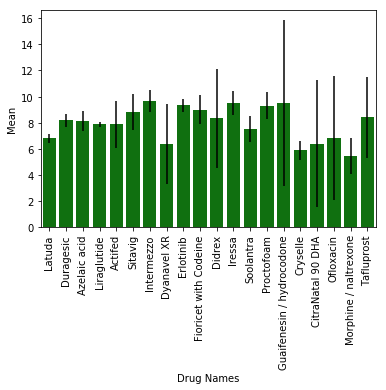

In [0]:
# For plotting
reduceddf = restructred_df.sample(20)

sns.barplot(x='drugnames', y='means', 
            data=reduceddf, 
            color="green", 
            yerr=reduceddf['ci'])
plt.xticks(rotation='vertical');
plt.xlabel("Drug Names")
plt.ylabel("Mean")

In [0]:
df.head(1).T

,0
Unnamed: 0,206461
drugName,Valsartan
condition,Left Ventricular Dysfunction
review,"""It has no side effect, I take it in combinati..."
rating,9
date,"May 20, 2012"
usefulCount,27


In [0]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [0]:
df.describe(exclude=[np.number])

,drugName,condition,review,date
count,161297,161297,161297,161297
unique,3436,884,112329,3579
top,Levonorgestrel,Birth Control,"""Good""","March 1, 2016"
freq,3657,28950,33,146


In [0]:
df[df.drugName == "Levonorgestrel"]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
83,131041,Levonorgestrel,Birth Control,"""I had the Mirena put in almost a year ago. In...",1.0,"January 18, 2010",10
113,166891,Levonorgestrel,Birth Control,"""My time with skyla has been an absolute breez...",10.0,"July 14, 2016",1
139,130867,Levonorgestrel,Birth Control,"""I&#039;m 27 w/ two kids. After my second chil...",2.0,"June 26, 2011",2
144,165523,Levonorgestrel,Birth Control,"""Had the Liletta inserted in November. The pro...",3.0,"May 24, 2017",4
171,130582,Levonorgestrel,Birth Control,"""I am 25 yrs old, no kids and have never been ...",10.0,"May 7, 2012",1
233,167487,Levonorgestrel,Emergency Contraception,"""Let me just tell you, to those reading these ...",9.0,"February 26, 2016",11
291,142693,Levonorgestrel,Birth Control,"""I&#039;ve been on birth control for a while n...",4.0,"August 9, 2017",3
327,129501,Levonorgestrel,Emergency Contraception,"""Ok girls if your reading this it&#039;s becau...",10.0,"August 5, 2015",19
355,130586,Levonorgestrel,Birth Control,"""I have had my Mirena for three months now. In...",10.0,"May 1, 2012",2


In [0]:
df.condition.unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

In [0]:
depressiondf = df[df.condition == "Depression"]

In [0]:
depressiondf.describe()

,Unnamed: 0,rating,usefulCount
count,9105.000000,9105.000000,9105.000000
mean,132622.159473,7.102252,50.452608
std,60806.858549,3.101388,58.698516
min,668.000000,1.000000,0.000000
25%,89495.000000,5.000000,17.000000
50%,131726.000000,8.000000,33.000000
75%,183275.000000,10.000000,65.000000
max,232218.000000,10.000000,1291.000000


In [0]:
depressiondf.describe(exclude=[np.number])

,drugName,condition,review,date
count,9105,9105,9105,9105
unique,131,1,6326,2768
top,Bupropion,Depression,"""I have suffered from severe depression/anxiet...","April 26, 2017"
freq,549,9105,3,15


In [0]:
depressiondf.drugName.unique()

array(['L-methylfolate', 'Sertraline', 'Venlafaxine', 'Effexor XR',
       'Wellbutrin', 'Aripiprazole', 'Desvenlafaxine', 'Fluoxetine',
       'Bupropion', 'Trintellix', 'Trazodone', 'Pristiq',
       'Levomilnacipran', 'Cymbalta', 'Escitalopram', 'Nardil', 'Zoloft',
       'Methylphenidate', 'Wellbutrin XL', 'Lexapro', 'Viibryd',
       'Effexor', 'Zyprexa', 'Duloxetine', 'Rexulti', 'Quetiapine',
       'Citalopram', "St. john's wort", 'Vilazodone', 'Emsam',
       'Acetaminophen / butalbital / caffeine / codeine', 'Celexa',
       'Vortioxetine', 'Paxil', 'Prozac', 'Lamotrigine', 'Isocarboxazid',
       'Limbitrol', 'Paroxetine', 'Deplin', 'Serzone', 'Xanax', 'Parnate',
       'Elavil', 'Wellbutrin SR', 'Remeron', 'Brexpiprazole',
       'S-adenosylmethionine', 'Nefazodone', 'Abilify', 'Amitriptyline',
       'Selegiline', 'Alprazolam', 'Tramadol', 'Fluvoxamine', 'Seroquel',
       'Olanzapine', 'Oleptro', 'Symbyax', 'Mirtazapine', 'Desipramine',
       'Seroquel XR', 'Imipramine', 

In [0]:
topdepressiondrug = depressiondf.drugName.value_counts().head(1).keys()

In [0]:
topdepressiondrug

Index(['Bupropion'], dtype='object')

In [0]:
bupropiondf = depressiondf[depressiondf.drugName == "Bupropion"]
bupropiondf.describe()

,Unnamed: 0,rating,usefulCount
count,549.000000,549.000000,549.000000
mean,225416.788707,7.358834,56.650273
std,433.782480,2.940502,59.431535
min,224452.000000,1.000000,0.000000
25%,225064.000000,6.000000,16.000000
50%,225492.000000,8.000000,39.000000
75%,225782.000000,10.000000,78.000000
max,226096.000000,10.000000,389.000000


In [0]:
bupropiondf.describe(exclude=[np.number])

,drugName,condition,review,date
count,549,549,549,549
unique,1,1,549,501
top,Bupropion,Depression,"""Let me explain how I believe Wellbutrin works...","January 13, 2010"
freq,549,549,1,4


In [0]:
bupropiondf.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
153,225257,Bupropion,Depression,"""I was really glad that I experienced none of ...",4.0,"October 8, 2015",0
184,224842,Bupropion,Depression,"""F/26, Wellbutrin SR 100mg twice a day &amp; I...",10.0,"January 2, 2017",14
420,225955,Bupropion,Depression,"""Wellbutrin has significantly improved my over...",8.0,"June 8, 2009",46
1045,225545,Bupropion,Depression,"""I have taken Prozac, Zoloft, Paxil, and then ...",10.0,"November 23, 2013",41
1087,225531,Bupropion,Depression,"""I was in a bad car accident 3 years ago and i...",10.0,"June 22, 2014",88


In [0]:
bupropiondf['date'] =  pd.to_datetime(bupropiondf['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
bupropiondf.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
153,225257,Bupropion,Depression,"""I was really glad that I experienced none of ...",4.0,2015-10-08,0
184,224842,Bupropion,Depression,"""F/26, Wellbutrin SR 100mg twice a day &amp; I...",10.0,2017-01-02,14
420,225955,Bupropion,Depression,"""Wellbutrin has significantly improved my over...",8.0,2009-06-08,46
1045,225545,Bupropion,Depression,"""I have taken Prozac, Zoloft, Paxil, and then ...",10.0,2013-11-23,41
1087,225531,Bupropion,Depression,"""I was in a bad car accident 3 years ago and i...",10.0,2014-06-22,88


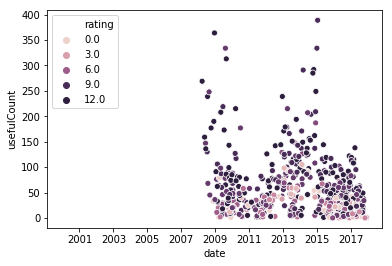

In [86]:
sns.scatterplot(x='date', y='usefulCount', hue='rating',data=bupropiondf)

In [0]:
sns.__version__

'0.9.0'

In [0]:
bupropiondf.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

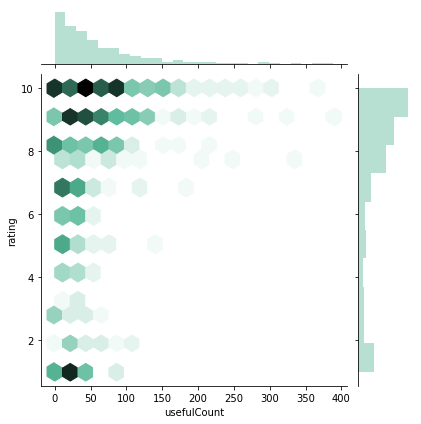

In [0]:
sns.jointplot(x=bupropiondf['usefulCount'], 
              y=bupropiondf['rating'], 
              kind="hex", 
              color="#4CB391");

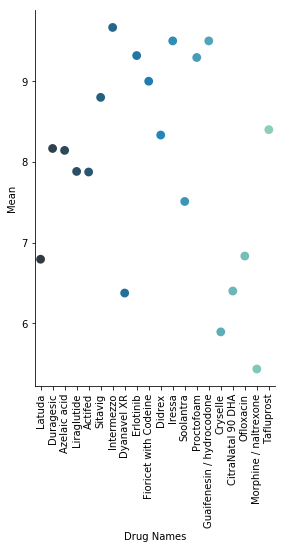

In [74]:
sns.catplot(x="drugnames", y="means",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=reduceddf, yerr=reduceddf['ci'])

plt.xticks(rotation='vertical');
plt.xlabel("Drug Names")
plt.ylabel("Mean");